Travail réalisé par Muthulingam Aginth

## Chargement des modules 

In [3]:
import pandas as pd
import numpy as np
import re
import seaborn as sns
import plotly
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None  # default='warn'
from sklearn.impute import KNNImputer 

## Chargement des données

In [4]:
dataset = pd.read_csv('fr.openfoodfacts.org.products.csv', sep='\t')

C:\Users\Agint\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (0,3,5,19,20,24,25,26,27,28,35,36,37,38,39,48) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [103]:
dataset

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,3087,http://world-fr.openfoodfacts.org/produit/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4530,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN
2,4559,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Peanuts,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
3,16087,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055731,2017-03-09T10:35:31Z,1489055731,2017-03-09T10:35:31Z,Organic Salted Nut Mix,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,12.0,NaN,NaN
4,16094,http://world-fr.openfoodfacts.org/produit/0000...,usda-ndb-import,1489055653,2017-03-09T10:34:13Z,1489055653,2017-03-09T10:34:13Z,Organic Polenta,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320767,9948282780603,http://world-fr.openfoodfacts.org/produit/9948...,openfoodfacts-contributors,1490631299,2017-03-27T16:14:59Z,1491244498,2017-04-03T18:34:58Z,Tomato & ricotta,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320768,99567453,http://world-fr.openfoodfacts.org/produit/9956...,usda-ndb-import,1489059076,2017-03-09T11:31:16Z,1491244499,2017-04-03T18:34:59Z,"Mint Melange Tea A Blend Of Peppermint, Lemon ...",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN
320769,9970229501521,http://world-fr.openfoodfacts.org/produit/9970...,tomato,1422099377,2015-01-24T11:36:17Z,1491244499,2017-04-03T18:34:59Z,乐吧泡菜味薯片,Leba pickle flavor potato chips,50 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
320770,9980282863788,http://world-fr.openfoodfacts.org/produit/9980...,openfoodfacts-contributors,1492340089,2017-04-16T10:54:49Z,1492340089,2017-04-16T10:54:49Z,Tomates aux Vermicelles,NaN,67g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notre Dataset possède 320 0772 lignes et 162 colonnes

## Selection des variables et premier nettoyage

In [64]:
# Liste de toutes les variables nutritionnelles
ls_var = ['product_name','energy_100g','casein_100g',
             'energy-from-fat_100g','proteins_100g',
             'serum-proteins_100g','nucleotides_100g',
             'carbohydrates_100g','sugars_100g','sucrose_100g',
             'glucose_100g','fructose_100g','lactose_100g',
             'maltose_100g','maltodextrins_100g','starch_100g',
             'polyols_100g','fat_100g','saturated-fat_100g',
             'butyric-acid_100g','caproic-acid_100g',
             'caprylic-acid_100g','capric-acid_100g',
             'lauric-acid_100g','myristic-acid_100g',
             'palmitic-acid_100g','stearic-acid_100g',
             'arachidic-acid_100g','behenic-acid_100g',
             'lignoceric-acid_100g','cerotic-acid_100g',
             'montanic-acid_100g','melissic-acid_100g',
             'monounsaturated-fat_100g','polyunsaturated-fat_100g',
             'omega-3-fat_100g','alpha-linolenic-acid_100g',
             'eicosapentaenoic-acid_100g','docosahexaenoic-acid_100g',
             'omega-6-fat_100g','linoleic-acid_100g','arachidonic-acid_100g',
             'gamma-linolenic-acid_100g','dihomo-gamma-linolenic-acid_100g',
             'omega-9-fat_100g','oleic-acid_100g','elaidic-acid_100g',
             'gondoic-acid_100g','mead-acid_100g','erucic-acid_100g',
             'nervonic-acid_100g','trans-fat_100g','cholesterol_100g',
             'fiber_100g','sodium_100g','alcohol_100g','vitamin-a_100g',
             'vitamin-d_100g','vitamin-e_100g','vitamin-k_100g',
             'vitamin-c_100g','vitamin-b1_100g','vitamin-b2_100g',
             'vitamin-pp_100g','vitamin-b6_100g','vitamin-b9_100g',
             'vitamin-b12_100g','biotin_100g','pantothenic-acid_100g',
             'silica_100g','bicarbonate_100g','potassium_100g','chloride_100g',
             'calcium_100g','phosphorus_100g','iron_100g','magnesium_100g',
             'zinc_100g','copper_100g','manganese_100g','fluoride_100g',
             'selenium_100g','chromium_100g','molybdenum_100g','iodine_100g',
             'caffeine_100g','taurine_100g','ph_100g','fruits-vegetables-nuts_100g',
             'nutrition-score-fr_100g']

In [104]:
len(ls_var)

90

In [65]:
def selection_var(ls_var, dataset):
    new_dataset = dataset[ls_var].copy()
    return new_dataset

def suppression_var (dataset_reduit):
    dataset_reduit['product_name'] = dataset_reduit['product_name'].astype(str)

    l = dataset_reduit.isnull().sum()/len(dataset_reduit.index)*100
    print('Tableau du % des Valeurs manquantes par variables \n\n',l)
    
    var_supp = list(l[l>60].index)
    print(len(var_supp),' variables supprimés sur ',len(dataset_reduit.columns) )
    
    new_dataset_reduit = dataset_reduit.copy()
    
    for i in var_supp :
        del (new_dataset_reduit[i])
        
    return new_dataset_reduit
    

In [66]:
dataset_reduit = selection_var(ls_var, dataset)

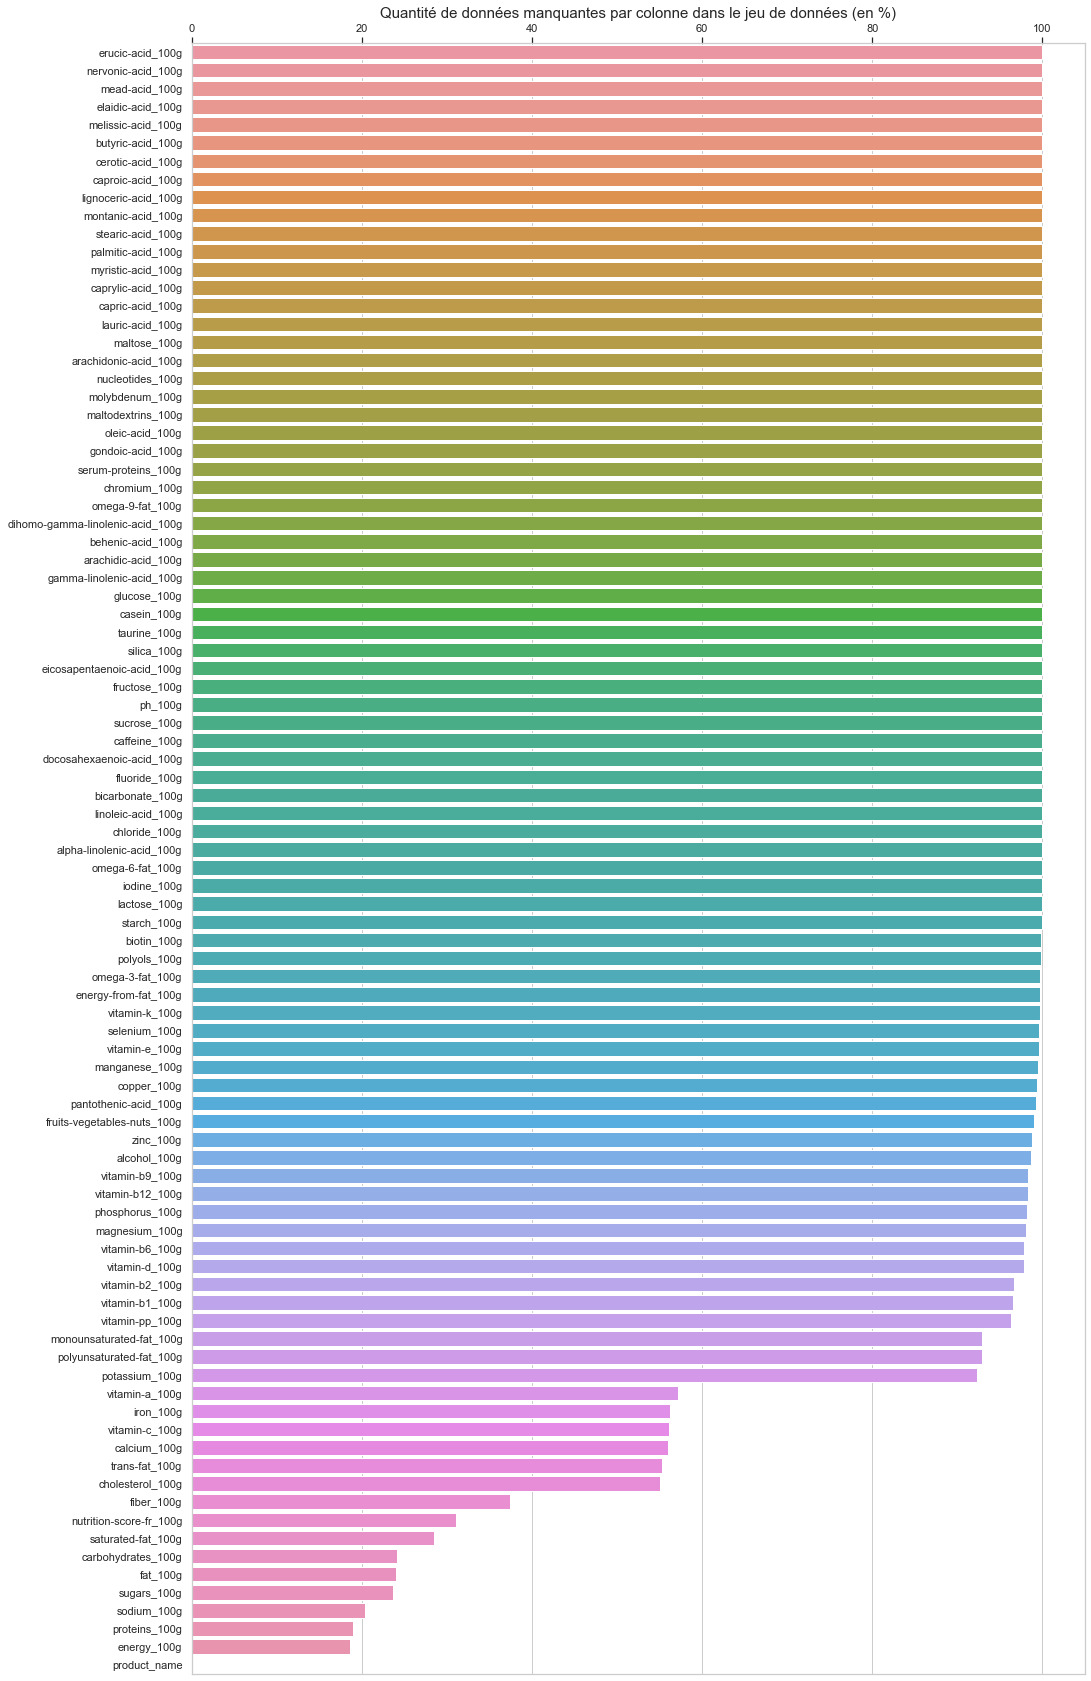

In [105]:
proportion_nan = dataset_reduit.isna().sum().divide(dataset_reduit.shape[0]/100).sort_values(ascending=False)

sns.set(style="whitegrid")
plt.figure(figsize=(16, 30))
ax = sns.barplot(y = proportion_nan.index, x=proportion_nan.values)
ax.xaxis.set_ticks_position('top')
plt.title('Quantité de données manquantes par colonne dans le jeu de données (en %)', size=15)
plt.show()

In [67]:
dataset_reduit2 = suppression_var(dataset_reduit)

Tableau du % des Valeurs manquantes par variables 

 product_name                    0.000000
energy_100g                    18.598568
casein_100g                    99.991583
energy-from-fat_100g           99.732832
proteins_100g                  18.969860
                                 ...    
caffeine_100g                  99.975684
taurine_100g                   99.990959
ph_100g                        99.984724
fruits-vegetables-nuts_100g    99.053533
nutrition-score-fr_100g        31.038245
Length: 90, dtype: float64
74  variables supprimés sur  90


On va garder 17 variables

In [68]:
dataset_reduit2['% Val Manq'] = dataset_reduit2.isnull().T.sum()/len(dataset_reduit2.columns)*100
dataset_reduit2 = dataset_reduit2.sort_values(by=['% Val Manq'], ascending=True)

<AxesSubplot:xlabel='% Val Manq', ylabel='Count'>

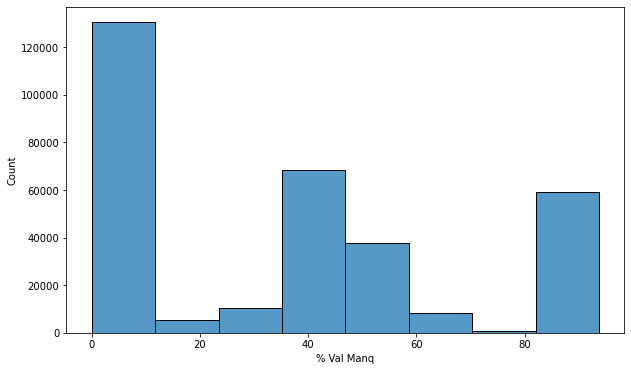

In [69]:
pl.figure(figsize=(10, 6))
sns.histplot(dataset_reduit2['% Val Manq'],bins=8)

In [71]:
dataset_reduit2 = dataset_reduit2[dataset_reduit2['% Val Manq']<60]

In [75]:
dataset_reduit2.shape

(252340, 17)

**On décide de ne garder que les ligne possèdant - de 60% de valeurs manquante. <br/>
Ainsi on va supprimer 68432 lignes dans notre dataset** <br/>
**Notre dataset après un 1er filtrage possède don 252340 ligne et 17 colonnes**

In [76]:
#On supprime les lignes pour lesquelles on a aucune info sur le nom
index_name_NaN = list(dataset_reduit2[dataset_reduit2['product_name'].isnull()==True].index)
print(len(index_name_NaN), ' Lignes ont été supprimés')


dataset_reduit2 = dataset_reduit2.drop(index_name_NaN)


0  Lignes ont été supprimés


In [77]:
def suppression_dup (df):
    
    dataset = df.copy()
    dataset = dataset.sort_values(by=['product_name','% Val Manq'], ascending=[True,True])
    df_dup = dataset['product_name'].duplicated()
    print('Valeur dupliqué = ', len(df_dup[df_dup==True]))

    ind_dup = list(df_dup[df_dup==True].index)
    dataset =dataset.drop(ind_dup)
        
    return dataset


def suppression_Ascii (dataset):

    test=dataset.copy()
    
    ls_str=" ,;:.?§!/\|{}()[]#~'-_+=01234567891&%"
    test['product_name'] = test['product_name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

    for i in ls_str :
        test['product_name'] = test['product_name'].str.replace(i, '') 

    ls = list(test[test['product_name']==''].index)
    test = test.drop(ls)
    index_ascii=list(test.index)
    dataset=dataset.loc[index_ascii]
    dataset['product_name'] = dataset['product_name'].str.normalize('NFKD').str.encode('ascii', errors='ignore').str.decode('utf-8')

    return dataset

In [78]:
#On efface les caractère non latins
dataset_reduit2 = suppression_Ascii (dataset_reduit2)


#On supprime les éléments dupliqués
dataset_reduit3 = suppression_dup (dataset_reduit2)


Valeur dupliqué =  72576


In [79]:
dataset_reduit3.shape

(179670, 17)

**Notre dataset présente 72576 Lignes duppliqués** 

## Verification du type de chaque colonne

In [80]:
def nettoyage_type(dataset_reduit):
    '''Corrige les types pour les colonnes'''
    type_var = dataset_reduit.dtypes
    try :
        for i in dataset_reduit.columns[1:]:
            dataset_reduit[i] = dataset_reduit[i].astype(str(type_var[i]))
            print( f'''toutes les données sont de type {str(type_var[i])} pour la col {i}''' )
    except:
        print(f'''Erreur de conversion de type, vérifiez les colonnes {i}''')
        
    return 

In [81]:
nettoyage_type(dataset_reduit3)

toutes les données sont de type float64 pour la col energy_100g
toutes les données sont de type float64 pour la col proteins_100g
toutes les données sont de type float64 pour la col carbohydrates_100g
toutes les données sont de type float64 pour la col sugars_100g
toutes les données sont de type float64 pour la col fat_100g
toutes les données sont de type float64 pour la col saturated-fat_100g
toutes les données sont de type float64 pour la col trans-fat_100g
toutes les données sont de type float64 pour la col cholesterol_100g
toutes les données sont de type float64 pour la col fiber_100g
toutes les données sont de type float64 pour la col sodium_100g
toutes les données sont de type float64 pour la col vitamin-a_100g
toutes les données sont de type float64 pour la col vitamin-c_100g
toutes les données sont de type float64 pour la col calcium_100g
toutes les données sont de type float64 pour la col iron_100g
toutes les données sont de type float64 pour la col nutrition-score-fr_100g
tou

## Traitement Outlier 

In [82]:
dataset_reduit4 = dataset_reduit3.copy()
del(dataset_reduit4['% Val Manq'])

In [83]:
def suppression_outliers(dataset):
#Suppression des valeurs extrêmes du dataset - on exclut le centile le plus extreme

    dataframe =dataset.copy()
       
    for col in dataframe.select_dtypes(include = ['int32','float64']).columns.tolist() :
        
        if col != 'nutrition-score-fr_100g' :
            index_nan = []
        
            index_nan += dataframe.loc[dataframe[col] > dataframe[col].quantile(0.995)].index.tolist()
            index_nan += dataframe.loc[dataframe[col] < dataframe[col].quantile(0.005)].index.tolist()
            index_nan += dataframe.loc[dataframe[col] < 0].index.tolist()
        
            if (col[-5:] == '_100g'):
                index_nan += dataframe.loc[dataframe[col] < 0].index.tolist()
                if (col != 'energy_100g'):
                    index_nan += dataframe.loc[dataframe[col] > 100].index.tolist()
            
            dataframe[col].loc[index_nan] = np.nan
            
            
    return dataframe

In [84]:
dataset_reduit5=suppression_outliers(dataset_reduit4)

In [22]:
dataset_reduit4[dataset_reduit4['sugars_100g']==100].sort_values(by=['sugars_100g'],ascending='True')

,product_name,energy_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,fiber_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
50756,0 Calorie Saccharin Sweetener,0.0,0.0,100.0,100.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
125870,Pure Cane Granulated Suagr,1569.0,0.0,100.0,100.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
13091,Pure Cane Granulated Sugar,1569.0,0.0,100.0,100.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
60587,"Pure Cane Granulated Sugar, Coffee Service",1569.0,0.0,100.0,100.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN
94994,Pure Cane Granulated White Sugar,1569.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,14.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9084,Frost Blue Sanding Sugar Decorating,1569.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0
9252,Frosted Mix,2092.0,0.0,100.0,100.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,16.0
293467,Fruchtzucker Fructose,1700.0,0.0,100.0,100.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,15.0
140146,"Golchin, Yellow Small Candy Pieces",1674.0,0.0,100.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0


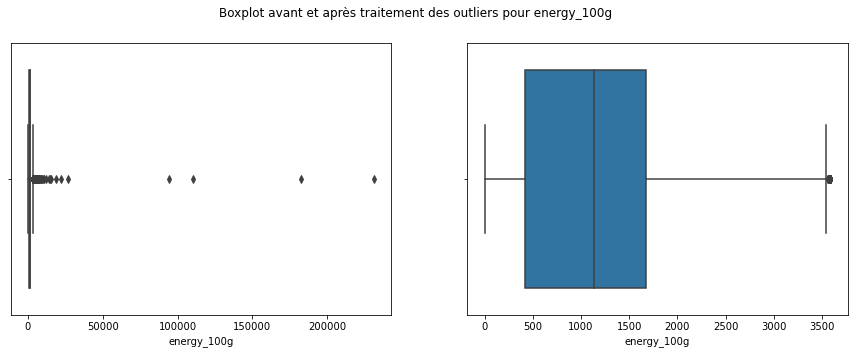

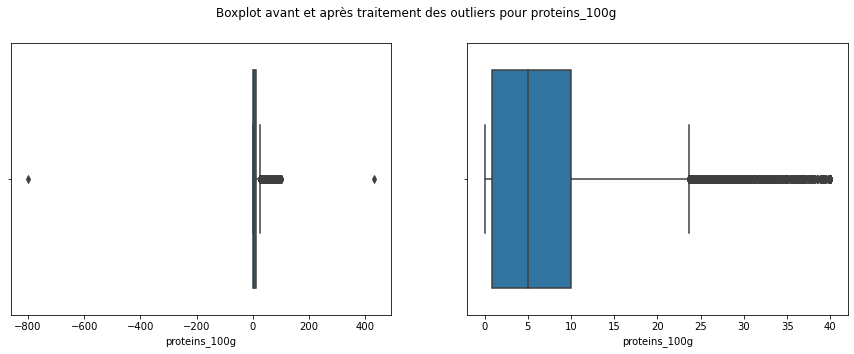

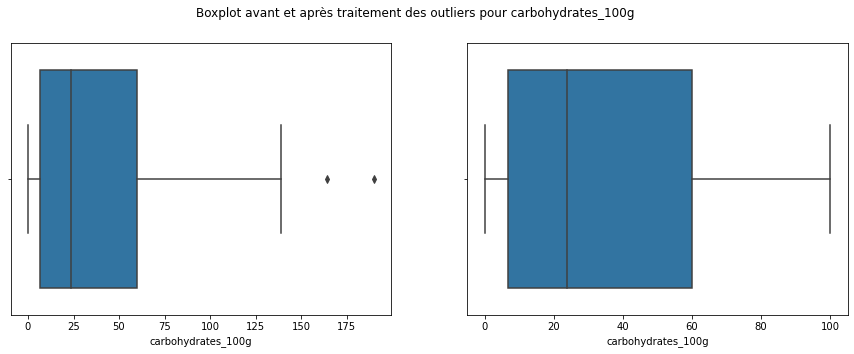

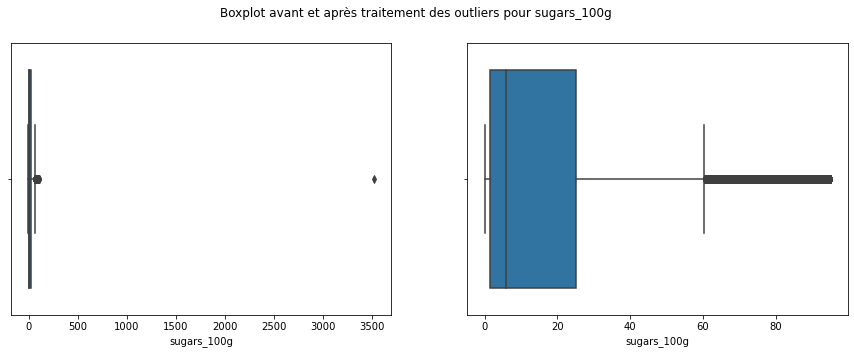

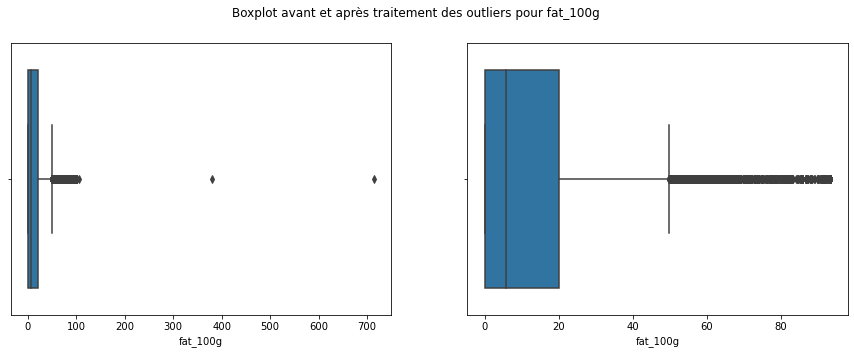

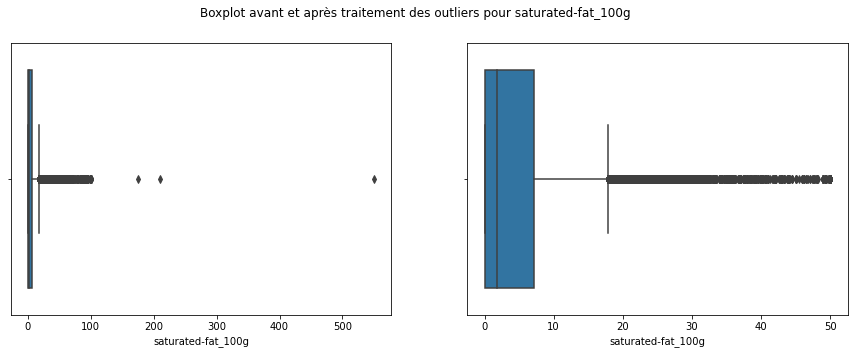

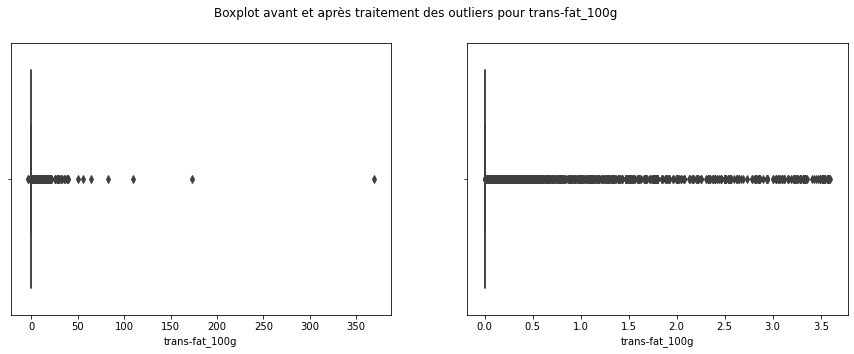

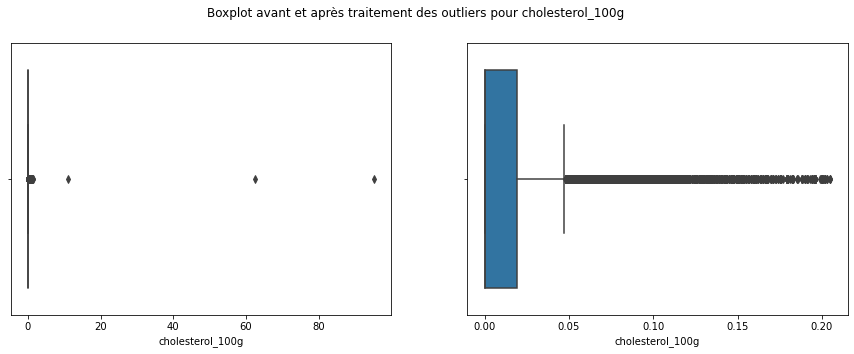

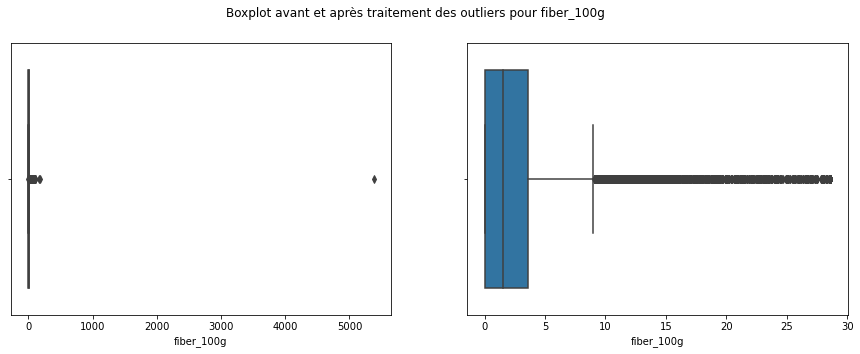

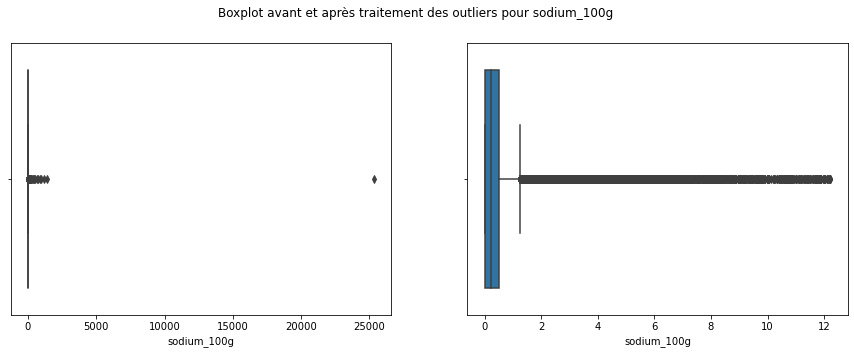

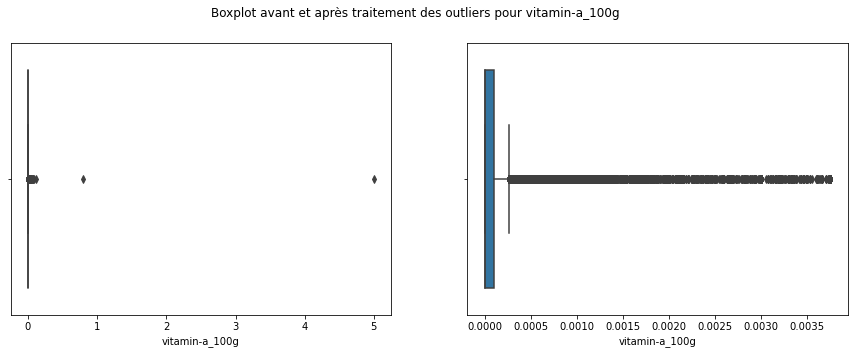

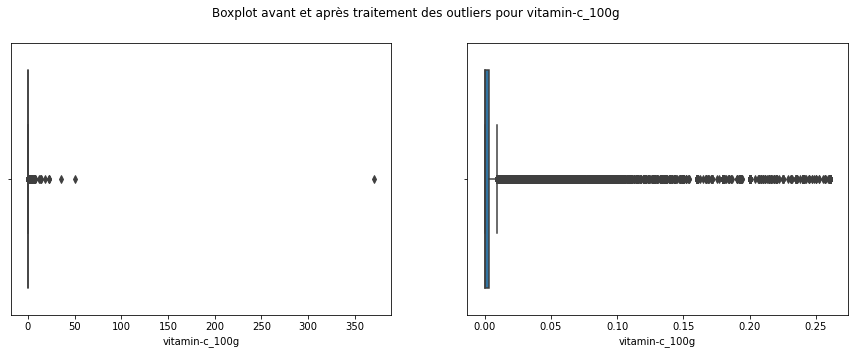

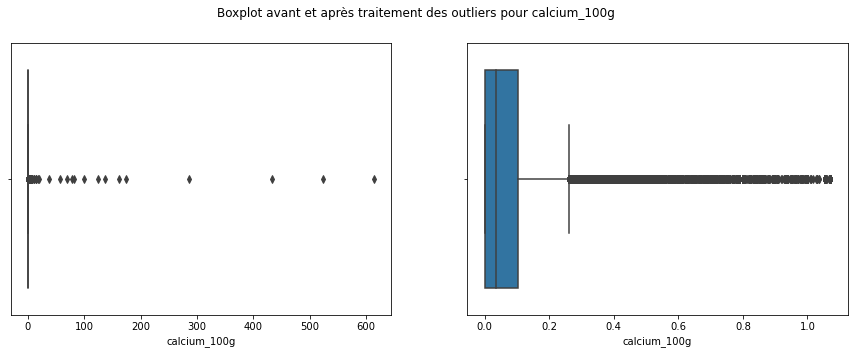

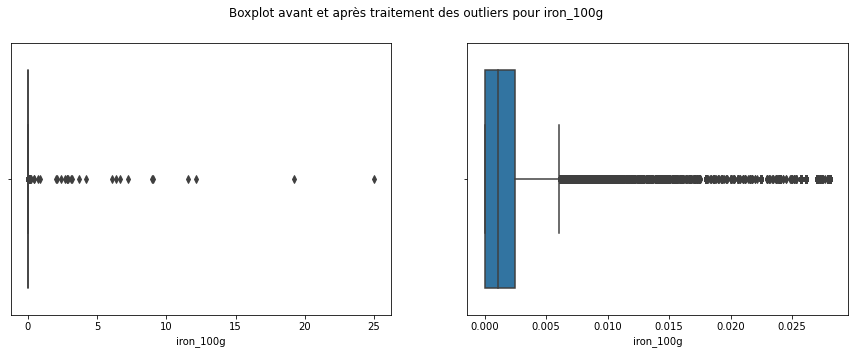

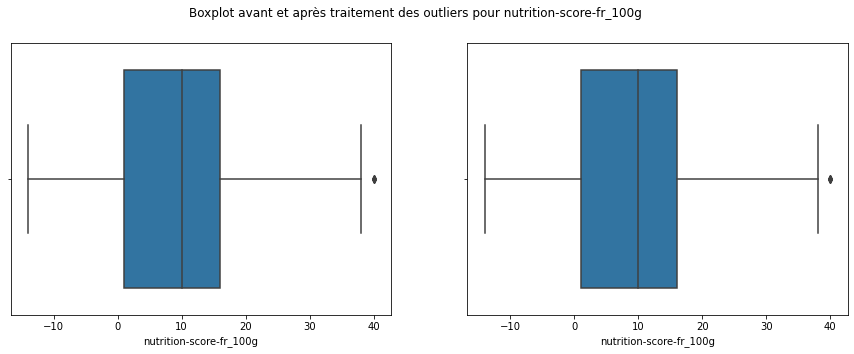

In [85]:
col = list(dataset_reduit5.columns)[1:]

if len(col)< 30 :
    for i in col: 

        fig, axs = plt.subplots(1,2,figsize=(15,5))
        axs = axs.ravel()
    
        sns.boxplot(x=dataset_reduit4[i],ax=axs[0])
        sns.boxplot(x=dataset_reduit5[i],ax=axs[1])
        titre = 'Boxplot avant et après traitement des outliers pour '+i
        fig.suptitle(titre)
    
    
    plt.show()


## Imputation des valeurs manquantes via KNN

In [86]:
dataset_reduit5.isna().sum()

product_name                   0
energy_100g                  960
proteins_100g               1419
carbohydrates_100g         14185
sugars_100g                 5606
fat_100g                   14840
saturated-fat_100g         15544
trans-fat_100g             83446
cholesterol_100g           82852
fiber_100g                 35951
sodium_100g                 1902
vitamin-a_100g             86485
vitamin-c_100g             84124
calcium_100g               83968
iron_100g                  84492
nutrition-score-fr_100g    19773
dtype: int64

In [87]:
col=list(dataset_reduit5.columns)
df_Av_imputation = dataset_reduit5.copy()[col[1:]]

In [88]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(df_Av_imputation)
df_Ap_imputation = pd.DataFrame(imputed, columns=df_Av_imputation.columns)

In [89]:
produit_name = dataset_reduit5['product_name'].tolist()
df_name=pd.DataFrame(produit_name,columns=['product_name'])
dataset_reduit6 = pd.concat((df_name,df_Ap_imputation),axis=1)

In [90]:
dataset_reduit6

,product_name,energy_100g,proteins_100g,carbohydrates_100g,sugars_100g,fat_100g,saturated-fat_100g,trans-fat_100g,cholesterol_100g,fiber_100g,sodium_100g,vitamin-a_100g,vitamin-c_100g,calcium_100g,iron_100g,nutrition-score-fr_100g
0,- AVRAMENTO-TERMIN,711.0,1.6,19.0,17.466667,9.6,0.8000,0.0,0.000000,2.2,0.475000,0.000060,0.002000,0.076667,0.000847,13.333333
1,- Roasted Eggplant,142.0,0.0,8.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.460000,0.000000,0.010367,0.005667,0.000093,5.000000
2,(Creamy),2615.0,21.9,22.0,9.400000,50.0,10.9375,0.0,0.000000,6.3,0.500000,0.000000,0.000000,0.000000,0.002250,19.000000
3,Milka Bubbles,2280.0,5.4,59.0,58.500000,31.5,16.5000,0.0,0.021333,0.2,0.150000,0.000000,0.000000,0.106000,0.002180,27.000000
4,&quot;Fit GO!&quot;,477.0,4.3,7.1,4.236667,7.1,3.2000,0.0,0.018000,7.0,0.130000,0.000157,0.012167,0.124333,0.000973,16.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
179665,zarte Heringsfilets in Tomatensauce,774.0,11.8,6.5,4.800000,12.2,2.1000,0.0,0.074667,0.1,0.500000,0.000051,0.003533,0.047667,0.001460,5.000000
179666,zero calorie syrup,18.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,1.1,0.216535,0.000214,0.000000,0.151667,0.000097,1.000000
179667,zevia,0.0,0.0,0.0,0.000000,0.0,0.0000,0.0,0.000000,0.0,0.000000,0.000000,0.016000,0.000000,0.000000,6.666667
179668,zumo Bi frutas,88.0,0.3,4.8,4.800000,0.0,0.0000,0.0,0.000000,0.5,0.011811,0.000120,0.016667,0.011333,0.000000,1.000000


In [91]:
dataset_reduit6.isna().sum()

product_name               0
energy_100g                0
proteins_100g              0
carbohydrates_100g         0
sugars_100g                0
fat_100g                   0
saturated-fat_100g         0
trans-fat_100g             0
cholesterol_100g           0
fiber_100g                 0
sodium_100g                0
vitamin-a_100g             0
vitamin-c_100g             0
calcium_100g               0
iron_100g                  0
nutrition-score-fr_100g    0
dtype: int64

## Suppression des aliment avec une somme de macro > 100g

In [92]:
dataset_reduit6['sum_100g']=dataset_reduit6['fat_100g']+dataset_reduit6['carbohydrates_100g']+dataset_reduit6['fiber_100g']+dataset_reduit6['proteins_100g']

In [95]:
dataset_reduit6[dataset_reduit6['sum_100g']>100].shape

(10971, 17)

**On a 10971 aliments pour lesquels la sommes des macros est supérieur à 100g. On les supprime donc**

In [98]:
dataset_reduit6 = dataset_reduit6[dataset_reduit6['sum_100g']<100]
dataset_reduit6.shape

(165804, 17)

In [101]:
del(dataset_reduit6['sum_100g'])

## Chargement du dataset cleané

In [102]:
dataset_reduit6.to_csv ('df_openfood_clean.csv', index = False, header=True)